In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi
import numpy as np
from Main_Function import fun_vor_main

In [2]:
def check_non_expansive(dist_to_previous, plot=True):
    """
    Check non-expansiveness using distance_from_found_to_previous
    produced by fun_vor_main.

    Parameters
    ----------
    dist_to_previous : dict
        Keys like 'iteration_1', 'iteration_2', ...
        Each value is a list of N floats = per-seed displacement.

    plot : bool, default=True
        If True, plots the semilog decay of the mean distance.

    Returns
    -------
    mean_distances : list of float
        Mean displacement per iteration.

    growth_factors : list of float
        Ratios mean_distances[k] / mean_distances[k-1], k >= 1.
    """
    keys = sorted(dist_to_previous.keys(),
                  key=lambda x: int(x.split("_")[1]))

    mean_distances = []
    for k in keys:
        mean_distances.append(np.mean(dist_to_previous[k]))

    growth_factors = []
    for k in range(1, len(mean_distances)):
        if mean_distances[k-1] > 0:
            growth_factors.append(mean_distances[k] / mean_distances[k-1])
        else:
            growth_factors.append(0.0)

    if plot:
        iters = np.arange(1, len(mean_distances)+1)
        plt.semilogy(iters, mean_distances, marker='o')
        plt.xlabel("Iteration")
        plt.ylabel("Mean displacement (‖xₖ₊₁ - xₖ‖₂)")
        plt.title("Non-expansiveness check")
        plt.grid(True, which="both", ls="--")
        plt.show()

    return mean_distances, growth_factors

In [3]:
points = np.random.rand(50, 2)
vor = Voronoi(points,qhull_options='Qc')

explicit_voronoi, vertices, cell_centers, dist_to_original, dist_to_previous = fun_vor_main(vor, points)

print('dist_to_previous:', dist_to_previous)


NameError: name 'np' is not defined

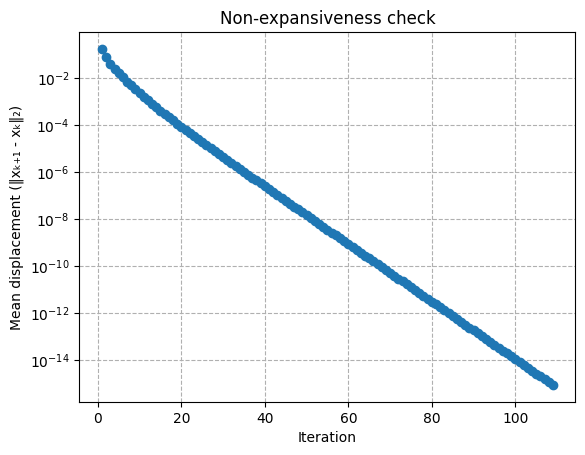

In [ ]:
distances, factors = check_non_expansive(dist_to_previous, plot=False)

In [5]:
print("Distances between iterations:", distances)
print("Growth factors:", factors)
print("Max growth factor:", max(factors))

Distances between iterations: [0.16586739479705753, 0.07347096652380364, 0.03950728440648653, 0.02434825429142333, 0.01505871673777705, 0.010151327528085542, 0.006626065388607617, 0.004647889431472256, 0.0031357246703203915, 0.0022337344249628334, 0.001538361283155182, 0.001108060263151381, 0.0007761084597592864, 0.0005635154115733505, 0.00039997923353388707, 0.0002925689881690719, 0.00020994268110415175, 0.00015458447702435717, 0.00011198274617217067, 8.290484679288942e-05, 6.052463143455415e-05, 4.502570912673455e-05, 3.306470498295794e-05, 2.4710095714029437e-05, 1.823191033092186e-05, 1.3674664049470471e-05, 1.012978812476411e-05, 7.616100994240157e-06, 5.660536060283627e-06, 4.262008877651626e-06, 3.176229570388627e-06, 2.3935194516643173e-06, 1.7874973053838934e-06, 1.3478082508494865e-06, 1.0081724403522132e-06, 7.605467477308984e-07, 5.696138090415482e-07, 4.2987921142070213e-07, 3.223053779353557e-07, 2.433093981254838e-07, 1.8261347692473364e-07, 1.3786832112762886e-07, 1.035

In [6]:
NoP = [10, 50, 100 , 250 , 500 , 1000 , 2000 , 3000 , 4000 , 5000]
distances_list = {}

for n in NoP:
    pts = np.random.rand(n, 2)
    vor = Voronoi(pts,qhull_options='Qc')
    explicit_voronoi, vertices, cell_centers, dist_to_original, dist_to_previous = fun_vor_main(vor, pts)
    distances, factors = check_non_expansive(dist_to_previous, plot=False)
    # Store the distances for the last iteration with a key as {number_of_points_n}
    key_name = f'NoP_{n}'
    distances_list[key_name] = distances


            Converged after 101 iterations
            Converged after 123 iterations
            Converged after 131 iterations
            Converged after 111 iterations
            Converged after 121 iterations
            Converged after 114 iterations
            Converged after 124 iterations
            Converged after 111 iterations
            Converged after 115 iterations
            Converged after 136 iterations


In [7]:
# print distances_list dictionary to an excel file
import pandas as pd
df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in distances_list.items()]))
df.to_excel('non_expansiveness_distances.xlsx', index=False)


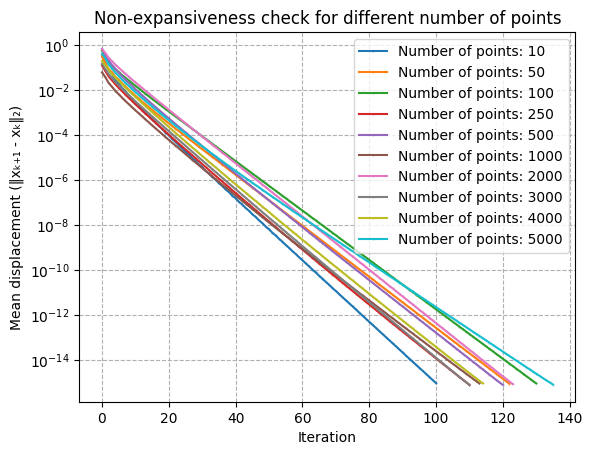

In [20]:
# read the excel file
df_read = pd.read_excel('non_expansiveness_distances.xlsx')
# plot the distances for each number of points
for n in NoP:
    key_name = f'NoP_{n}'
    label_name = f'Number of points: {n}'
    if key_name in df_read:
        plt.semilogy(df_read[key_name], marker='.', markersize=0.5, label=label_name)
        plt.xlabel("Iteration")
        plt.ylabel("Mean displacement (‖xₖ₊₁ - xₖ‖₂)")
        plt.title("Non-expansiveness check for different number of points")
        plt.grid(True, which="both", ls="--")
plt.legend()

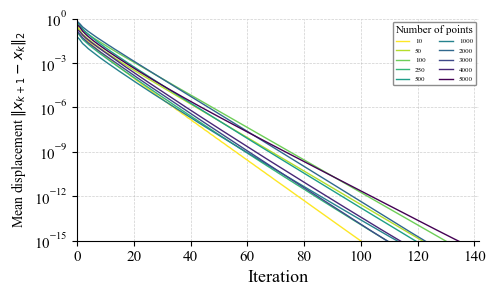

In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.cm as cm
import numpy as np


NoP = [10, 50, 100 , 250 , 500 , 1000 , 2000 , 3000 , 4000 , 5000]
# read excel
df_read = pd.read_excel("non_expansiveness_distances.xlsx")

plt.rcParams.update({
    "font.family": "Times New Roman",
    "font.size": 8,           # base font
    "axes.labelsize": 8,      # axis labels
    "axes.titlesize": 10,      # title
    "legend.fontsize": 5,     # legend
    "xtick.labelsize": 11,
    "ytick.labelsize": 11
})

colors = cm.viridis_r(np.linspace(0, 1, len(NoP)))
plt.figure(figsize=(5, 3))

for i,n in enumerate(NoP):
    key_name = f'NoP_{n}'
    if key_name in df_read:
        plt.semilogy(
            df_read[key_name],
            label=f"{n}",
            linewidth=1.0,
            color =colors[i]
        )

# Axis labels with LaTeX formatting
plt.xlabel("Iteration", fontsize=13)
plt.ylabel(r"Mean displacement $\|x_{k+1} - x_k\|_2$", fontsize=10)

# Title
# plt.title("Non-expansiveness check for different number of points", fontsize=12)

# Grid

plt.tick_params(axis="x", which="minor", bottom=False)  # turn off x minor ticks
plt.tick_params(axis="y", which="minor", left=True)     # enable y minor ticks
plt.grid(True, which="major", ls="--", linewidth=0.5, alpha=0.6)

plt.gca().xaxis.set_minor_locator(plt.NullLocator())
plt.xlim(left=0)     # start at 0
plt.ylim(1e-15, 1)   # neat log scale

# Legend outside
plt.legend(
    title="Number of points",
    loc="best",                # automatic best placement
    frameon=True,
    framealpha=0.9,
    edgecolor="gray",
    ncol=2                     # compact layout
)

# Remove top/right spines for cleaner look
for spine in ["top", "right"]:
    plt.gca().spines[spine].set_visible(False)

plt.tight_layout()
plt.show()
# plt.axis('equal')


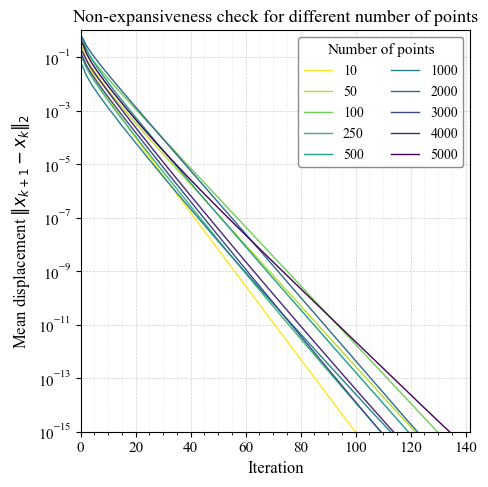

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.cm as cm

NoP = [10, 50, 100, 250, 500, 1000, 2000, 3000, 4000, 5000]
df_read = pd.read_excel("non_expansiveness_distances.xlsx")

# --- Style ---
plt.rcParams.update({
    "font.family": "Times New Roman",
    "font.size": 11,
    "axes.labelsize": 12,
    "axes.titlesize": 13,
    "legend.fontsize": 10,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11
})

plt.figure(figsize=(5, 5))

# --- Colors ---
colors = cm.viridis_r(np.linspace(0, 1, len(NoP)))

# --- Plot ---
for i, n in enumerate(NoP):
    key_name = f'NoP_{n}'
    if key_name in df_read:
        plt.semilogy(df_read[key_name],
                     label=f"{n}",
                     linewidth=1.0,
                     color=colors[i])

# --- Labels ---
plt.xlabel("Iteration")
plt.ylabel(r"Mean displacement $\|x_{k+1} - x_k\|_2$")
plt.title("Non-expansiveness check for different number of points")

# --- Grid & ticks ---
plt.grid(True, which="major", ls="--", lw=0.5, alpha=0.6)
plt.grid(True, which="minor", ls=":", lw=0.4, alpha=0.5)

plt.minorticks_on()
plt.tick_params(axis="x", which="minor", bottom=False)  # remove x minors
plt.tick_params(axis="y", which="minor", left=True)     # keep y minors

plt.xlim(left=0)
plt.ylim(1e-15, 1)

# --- Legend ---
plt.legend(title="Number of points",
           loc="best",
           frameon=True,
           framealpha=0.9,
           edgecolor="gray",
           ncol=2)

# --- Export ---
plt.tight_layout()
plt.savefig("non_expansiveness.pdf", dpi=600, bbox_inches="tight")
plt.show()


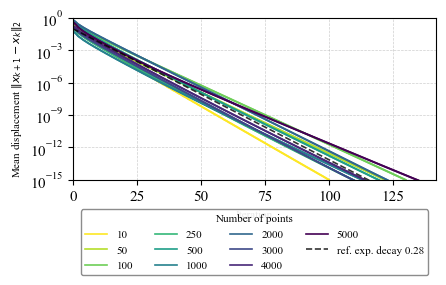

In [66]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.ticker as ticker

# --- Data ---
NoP = [10, 50, 100, 250, 500, 1000, 2000, 3000, 4000, 5000]
df_read = pd.read_excel("non_expansiveness_distances.xlsx")

# --- Global style ---
plt.rcParams.update({
    "font.family": "Times New Roman",
    "font.size": 8,
    "axes.labelsize": 8,
    "axes.titlesize": 13,
    "legend.fontsize": 8,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11
})

plt.figure(figsize=(4.5, 3))

# --- Colors ---
colors = cm.viridis_r(np.linspace(0, 1, len(NoP)))

# --- Plot with bounds ---
for i, n in enumerate(NoP):
    key_name = f'NoP_{n}'
    if key_name in df_read:
        values = df_read[key_name].dropna().to_numpy()

        # If you have multiple runs per iteration → reshape and compute min/mean/max
        # Example:
        # values = values.reshape(num_runs, num_iterations)
        # min_vals = values.min(axis=0)
        # mean_vals = values.mean(axis=0)
        # max_vals = values.max(axis=0)

        # For now, simulate with ±10% envelope
        mean_vals = values
        min_vals = values * 0.9
        max_vals = values * 1.1

        iterations = np.arange(len(mean_vals))

        # Mean (solid line)
        plt.semilogy(iterations, mean_vals, color=colors[i],
                     linewidth=1.2, label=f"{n}")

        # Min/Max (dashed lines)
        plt.semilogy(iterations, min_vals, color=colors[i],
                     linestyle="-", linewidth=0.8)
        plt.semilogy(iterations, max_vals, color=colors[i],
                     linestyle="-", linewidth=0.8)
        

# --- Reference exponential decay lines for semilogy ---
x_ref = np.arange(0, 130)   # iteration range
y0 = 1e-1                  # starting height (adjust to fit curves)

# slope -1 (slower exponential decay)
k1 = 0.28   # decay constant (tune to match slope visually)
y_ref1 = y0 * np.exp(-k1 * x_ref)
plt.semilogy(x_ref, y_ref1, 'k--', linewidth=1.2, alpha=0.8 , label = f"ref. exp. decay {k1}")
# plt.text(90, y_ref1[90]*1.5, "exp decay ~ slope -1",
#          fontsize=8, color='k')


# --- Labels ---
plt.xlabel("Iteration", fontsize=8)
plt.ylabel(r"Mean displacement $\|x_{k+1} - x_k\|_2$", fontsize=8)
# plt.title("Non-expansiveness check with boundaries")

# --- Grid ---
plt.grid(True, which="major", ls="--", lw=0.5, alpha=0.6)
plt.grid(True, which="minor", ls=":", lw=0.4, alpha=0.5)

# --- Y-axis ticks (major + minor) ---
ax = plt.gca()
# ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, subs=None))
# ax.yaxis.set_minor_locator(ticker.LogLocator(base=10.0,
#                                              subs=np.arange(2, 10) * 0.1))
# ax.yaxis.set_minor_formatter(ticker.NullFormatter())

# No x-axis minor ticks
plt.tick_params(axis="x", which="minor", bottom=False)


# --- Limits ---
plt.xlim(left=0)
plt.ylim(1e-15, 1)

# --- Legend ---
plt.legend(title="Number of points",
           loc="upper center",
            bbox_to_anchor=(0.5,-0.15 ),
           frameon=True,
           framealpha=0.9,
           edgecolor="gray",
           ncol=4)




# --- Export ---
plt.tight_layout()
plt.savefig("non_expansiveness_bounds.pdf", dpi=600, bbox_inches="tight")
plt.savefig("non_expansiveness_bounds.png", dpi=600, bbox_inches="tight")
plt.show()
